In [3]:
import json 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import time
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
from pandas import DataFrame
import numpy as np
import urllib.request
import requests
import os
import io

## Yahoo Finance Api

#### Big Movers Stocks

In [4]:
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-movers"

querystring = {"region":"US","lang":"en-US","start":"0","count":"6"}

headers = {
    'x-rapidapi-key': "cd603c944fmshac72815dd3c4501p1be808jsnc336bed6a1f0",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

response1 = requests.request("GET", url, headers=headers, params=querystring)

y = json.loads(response1.text)

DAY_GAINERS=pd.DataFrame.from_dict(y['finance']['result'][0]['quotes'])
DAY_LOSERS=pd.DataFrame.from_dict(y['finance']['result'][1]['quotes'])
MOST_ACTIVES=pd.DataFrame.from_dict(y['finance']['result'][2]['quotes'])

In [19]:
DAY_LOSERS['symbol'],MOST_ACTIVES['symbol']

(0    RLLCF
 1       EH
 2     RIOT
 3     YALA
 4    DFIFF
 5     SPWR
 Name: symbol, dtype: object,
 0     SNDL
 1     PLTR
 2     TSNP
 3    RLLCF
 4     AAPL
 5     RIOT
 Name: symbol, dtype: object)

In [6]:
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v3/get-historical-data"

querystring = {"symbol":"BTC-USD","region":"US"}

headers = {
    'x-rapidapi-key': "cd603c944fmshac72815dd3c4501p1be808jsnc336bed6a1f0",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

yahoo_res = requests.request("GET", url, headers=headers, params=querystring)


In [12]:
yahoo_finance = json.loads(yahoo_res.text)

In [14]:
df=pd.DataFrame.from_dict(reversed(yahoo_finance['prices']))

In [15]:
df['date']=df['date'].apply(lambda x:datetime.fromtimestamp(x).strftime("%Y-%m-%d %I:%M:%S"))

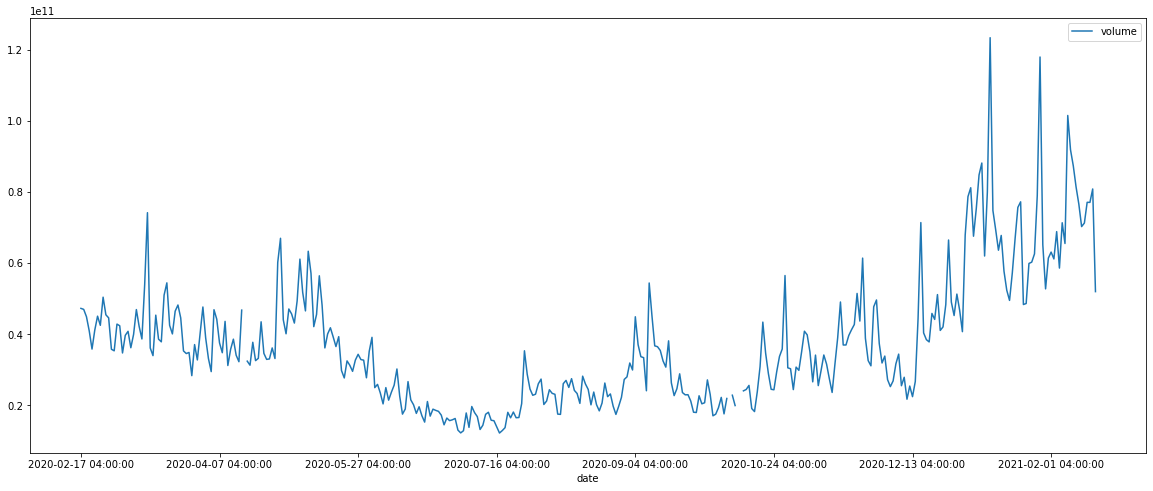

In [17]:
df.plot(kind='line',x="date",y='volume',figsize=(20,8))